In [1]:
#imports
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#this function updates the current distance travelled and time elapsed by the moving robot
def distance_update(d_current, t_current):
    d_total = d_current + d
    t_total = t_current + t_interval
    return (d_total, t_total) #returns the total travelled distance and the total elapsed time

In [3]:
#this function updates the x and y position of the robot each time step based on the
#distance travelled per time step, and the initial angle
def update_pos(x,y):
    delta_x = (d * (math.cos(math.radians(theta_init))))
    delta_y = (d * (math.sin(math.radians(theta_init))))
    #print("delta_x: ", delta_x)
    return (x + delta_x, y + delta_y)

In [4]:
def create_noise(pos, error):
    noise = []
    for itr in pos:
        noise.append((itr[0] + np.random.normal(0, error), itr[1] + np.random.normal(0, error)))
    return noise

In [5]:
#"time interval" between "measurements"
t_interval = 0.1

In [6]:
#initial position
x_init = 0 #robot starts at origin
y_init = 0

#initialize the robot position
x = x_init
y = y_init

#initial angle
theta_init = 0

In [7]:
#robot characteristics
#robot wheelbase (metres between wheels)
wheelbase = 0.25

#ticks per meter
tpm = 1000

#robot velocity (m/s)
v = 0.5

#distance travelled per time interval =  v (m/s) * t_interval (s) = (m)
d = v * t_interval

In [8]:
#list for positions
pos = []

In [9]:
#reset time
t = 0

In [10]:
#kalman characteristics

H_k = ([1, 0], [0, 1])
print(H_k)

([1, 0], [0, 1])


In [11]:
#distance to travel (m)
d_goal = 5
d_trav = 0
#reset time
t = 0
#reset pos
x = x_init
y = y_init
pos = []

In [12]:
#print(d_trav, t, x, y)
pos.append((x,y)) #append the starting position
while d_trav < d_goal:
    d_trav, t = distance_update(d_trav, t)
    x,y = update_pos(x, y)
    pos.append((x,y))
    #print("d_trav: ", d_trav)
    #print("x, y: ", x, y)
    #print(d_trav, t, x, y)

In [13]:
#print(pos)

In [14]:
L_pos = []
itr = 0
while itr < len(pos):
    x_wheel_pos = (pos[itr][0] - (wheelbase/2)*math.cos(math.radians(90-theta_init)))
    y_wheel_pos = (pos[itr][1] + (wheelbase/2)*math.sin(math.radians(90-theta_init)))
    L_pos.append((x_wheel_pos,y_wheel_pos))
    itr+=1

In [15]:
R_pos = []
itr = 0
while itr < len(pos):
    x_wheel_pos = (pos[itr][0] + (wheelbase/2)*math.cos(math.radians(90-theta_init)))
    y_wheel_pos = (pos[itr][1] - (wheelbase/2)*math.sin(math.radians(90-theta_init)))
    R_pos.append((x_wheel_pos,y_wheel_pos))
    itr+=1

In [16]:
#print(L_pos)

In [17]:
#print(pos)

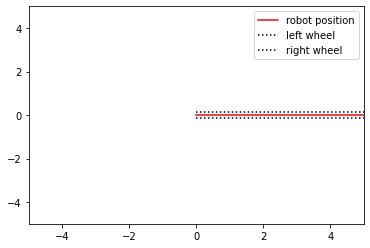

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure()
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.plot(*zip(*pos), label = 'robot position', color = 'r')
x_L,y_L = zip(*L_pos)
plt.plot(x_L,y_L, label = 'left wheel', color = 'k', linestyle = 'dotted')
x_R,y_R = zip(*R_pos)
plt.plot(x_R,y_R, label = 'right wheel', color = 'k', linestyle = 'dotted')
plt.legend()
plt.show()
plt.clf()

[(0.020879078877904002, -0.02541248433056316), (0.0998035569444482, 0.005804105205376217), (0.12656736093228108, -0.04878304042856666), (0.14057450295501453, 0.023856587791549536), (0.2815417749527174, 0.08018098303229208), (0.1653838110210838, -0.08342231425323866), (0.2560087371070361, -0.07734089460844483), (0.35692041662701146, 0.07064164590049334), (0.36458620376359097, 0.03338090685379113), (0.5084706179927567, -0.10584161086541582), (0.5125648889211815, -0.03199243438622999), (0.44514116591728603, -0.08649774519309467), (0.5396197141719149, 0.04055395258688798), (0.7318855337591887, -0.021122302011780697), (0.6006923259674941, 0.029092009811837058), (0.7995092240549564, -0.012915862526239177), (0.8466117301278581, 0.04342920742773138), (0.8793773991775058, -0.03316835415407616), (0.9667848704300976, 0.07713332005544027), (0.9447744554045144, -0.10680264801430071), (1.0312358981193699, 0.08869028576441094), (0.923018698274978, -0.03693549902603229), (1.0634188326167184, 0.0022301

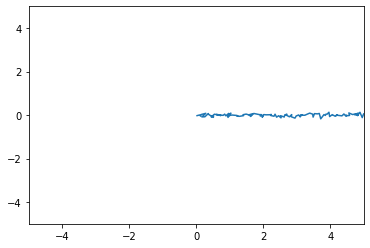

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure()
plt.xlim(-5,5)
plt.ylim(-5,5)
noisy = create_noise(pos, 0.05)
print(noisy)
x,y = zip(*noisy)
plt.plot(x,y)
plt.show()
plt.clf()